In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("/content/drive/MyDrive/data.csv")

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<ipython-input-6-0c97d926558e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=data, palette="viridis")


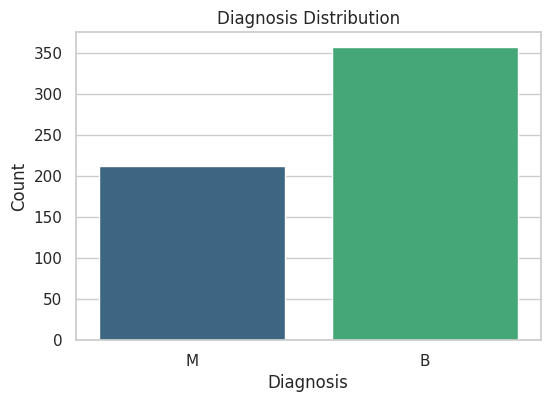

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=data, palette="viridis")
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

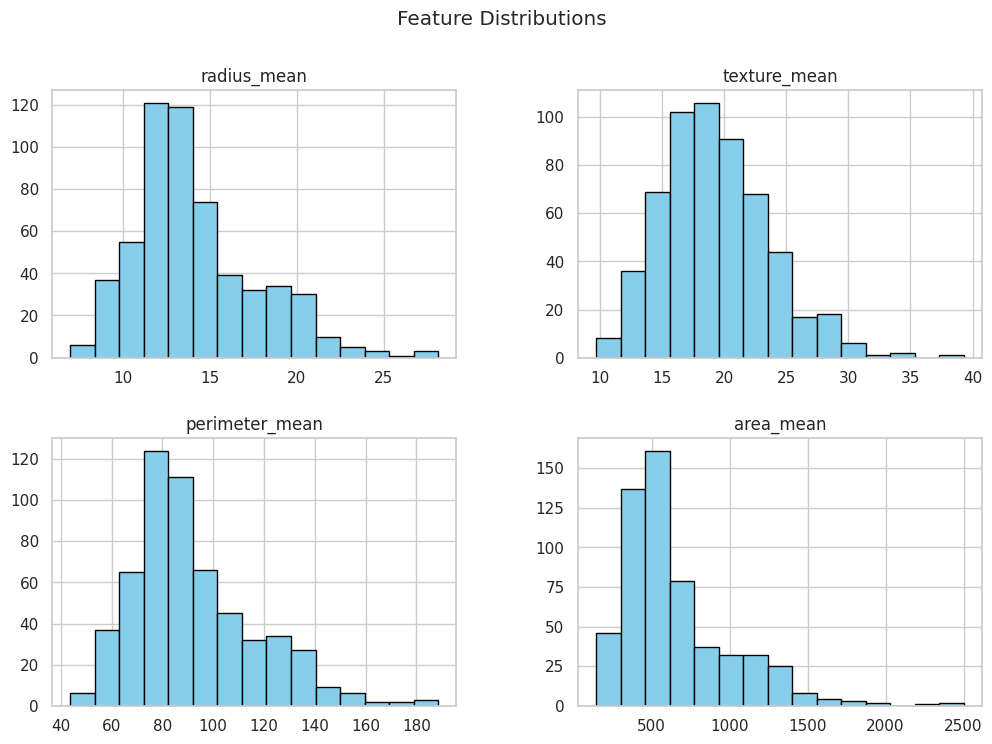

In [7]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
data[features].hist(bins=15, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

<ipython-input-8-827b831aa1cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=data, palette="coolwarm")
<ipython-input-8-827b831aa1cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=data, palette="coolwarm")
<ipython-input-8-827b831aa1cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=data, palette="coolwarm")
<ipython-input-8-827b831aa1cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.

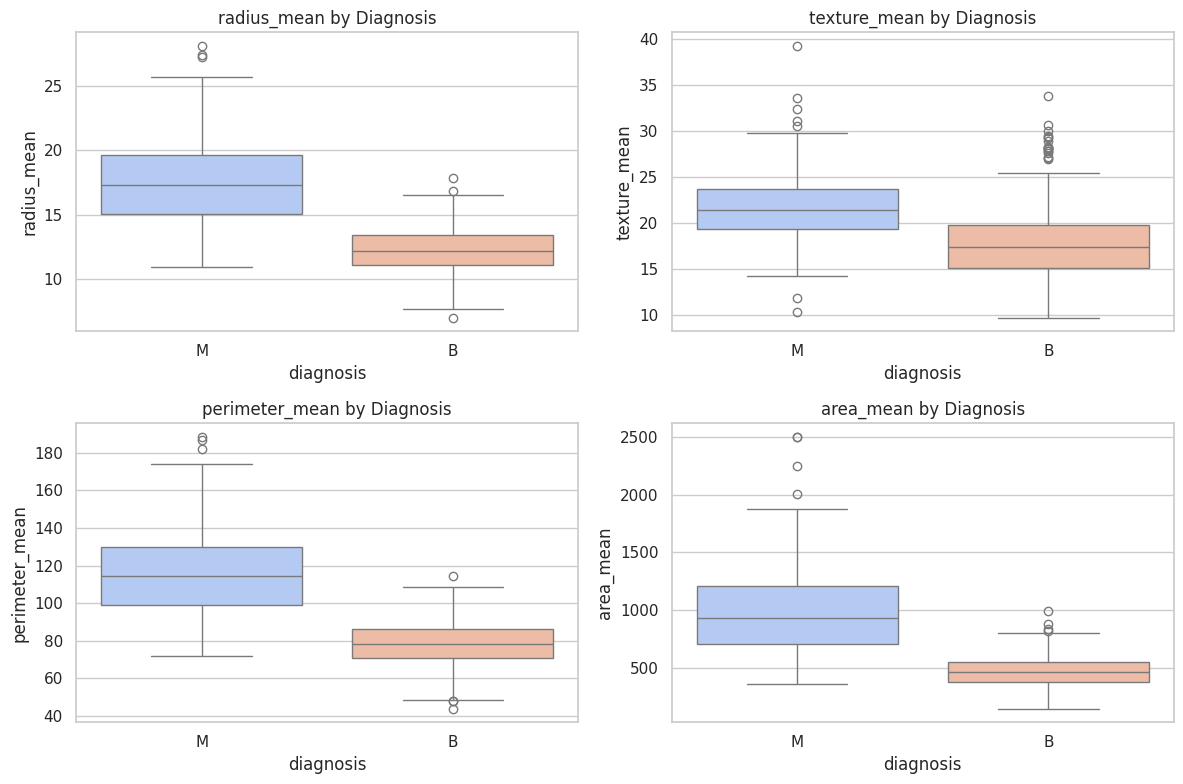

In [8]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='diagnosis', y=feature, data=data, palette="coolwarm")
    plt.title(f'{feature} by Diagnosis')
plt.tight_layout()
plt.show()

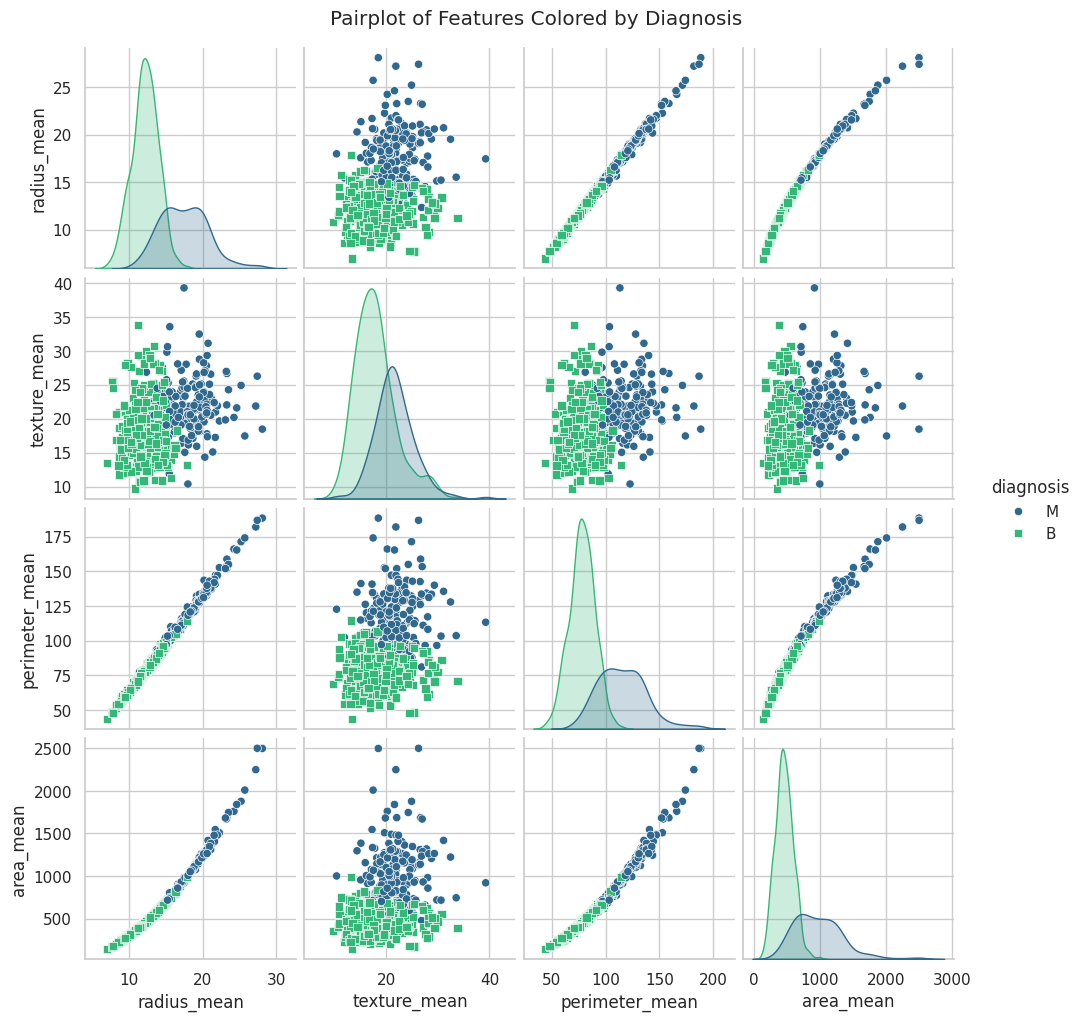

In [9]:
sns.pairplot(data, vars=features, hue='diagnosis', palette="viridis", markers=["o", "s"])
plt.suptitle('Pairplot of Features Colored by Diagnosis', y=1.02)
plt.show()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
data.drop(['Unnamed: 32', 'id'], axis = 1)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

In [12]:
y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis = 1)

In [13]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.15, random_state = 42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (32, 483)
x test:  (32, 86)
y train:  (483,)
y test:  (86,)


In [15]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1), 0.01)
    b = 0.0
    return w, b

In [16]:
def sigmoid(z):
    y_head = 1/(1 + np.exp(-z))
    return y_head

In [17]:
def forward_backward_propagation(w, b, x_train, y_train):
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = - y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
    cost = (np.sum(loss)) / x_train.shape[1]
    derivative_weight = (np.dot(x_train, (
        (y_head - y_train).T))) / x_train.shape[1]
    derivative_bias = np.sum(
        y_head-y_train) / x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,
                 "derivative_bias": derivative_bias}
    return cost, gradients

In [18]:
def update(w, b, x_train, y_train, learning_rate, number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []

    for i in range(number_of_iterarion):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)

        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration % i: % f" %(i, cost))

    parameters = {"weight": w, "bias": b}
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation ='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [19]:
def predict(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test)+b)
    Y_prediction = np.zeros((1, x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0, i]<= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1

    return Y_prediction


Cost after iteration  0:  nan
Cost after iteration  10:  nan
Cost after iteration  20:  nan
Cost after iteration  30:  nan
Cost after iteration  40:  nan
Cost after iteration  50:  nan
Cost after iteration  60:  nan
Cost after iteration  70:  nan
Cost after iteration  80:  nan
Cost after iteration  90:  nan


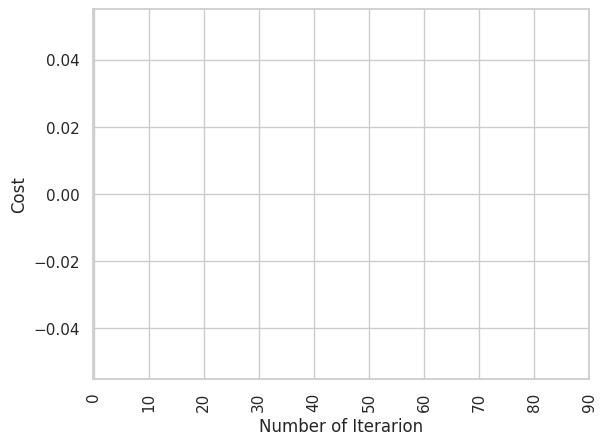

train accuracy: 37.267080745341616 %
test accuracy: 37.2093023255814 %


In [20]:
def logistic_regression(x_train, y_train, x_test, y_test,
                        learning_rate,  num_iterations):

    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(
        w, b, x_train, y_train, learning_rate, num_iterations)

    y_prediction_test = predict(
        parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(
        parameters["weight"], parameters["bias"], x_train)
    print("train accuracy: {} %".format(
        100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(
        100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

logistic_regression(x_train, y_train, x_test,
                    y_test, learning_rate = 1, num_iterations = 100)

In [21]:
from sklearn.impute import SimpleImputer
from sklearn import linear_model

imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train.T).T
x_test = imputer.transform(x_test.T).T

logreg = linear_model.LogisticRegression(random_state = 42, max_iter = 150)
print("test accuracy: {} ".format(
    logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(
    logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.6162790697674418 
train accuracy: 0.6314699792960663 


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
data_cleaned = data.drop(['id', 'Unnamed: 32'], axis=1)

In [30]:
label_encoder = LabelEncoder()
data_cleaned['diagnosis'] = label_encoder.fit_transform(data_cleaned['diagnosis'])

In [31]:
X = data_cleaned.drop('diagnosis', axis=1)
y = data_cleaned['diagnosis']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
model = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), activation='relu'),  # First hidden layer
    Dense(16, activation='relu'),                                  # Second hidden layer
    Dense(1, activation='sigmoid')                                 # Output layer (binary classification)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.8097 - loss: 0.5027 - val_accuracy: 1.0000 - val_loss: 0.2447
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9956 - loss: 0.2012 - val_accuracy: 1.0000 - val_loss: 0.1127
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0840 - val_accuracy: 1.0000 - val_loss: 0.0633
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0448 - val_accuracy: 1.0000 - val_loss: 0.0402
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0255 - val_accuracy: 1.0000 - val_loss: 0.0283
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0153 - val_accuracy: 1.0000 - val_loss: 0.0205
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0116 - val_accuracy: 1.0000 - val_loss: 0.0153
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0080 - val_accuracy: 1.0000 - val_loss

In [37]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 1.0000 - loss: 1.5496e-04
Test Accuracy: 1.0000
